In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile as zip
import os

In [2]:
######################################################################################
## FUNCTIONS #########################################################################

def read_zip(filename):
    z = zip.ZipFile("Data/" + filename, "r")
    df = pd.read_csv(z.open(z.namelist()[0]), header = 0)
    z.close()
    return df

In [3]:
######################################################################################
## INLEZEN ###########################################################################
files = os.listdir('Data')
li = []   
for filename in files:
    df = read_zip(filename)
    li.append(df)

disney = df = pd.concat(li)

In [40]:
disney = df.copy()

In [41]:
######################################################################################
## MANIPULEREN #######################################################################
## P2
disney = disney[disney["PRICE"] != 0.00]
disney

,SYMBOL,DATE,TIME,PRICE,SIZE,G127,CORR,COND,EX
0,DIS,2008/01/02,9:30:02,32.32,2000,0,0,O,T
1,DIS,2008/01/02,9:30:02,32.32,2000,0,0,Q,T
2,DIS,2008/01/02,9:30:02,32.34,100,0,0,@,T
3,DIS,2008/01/02,9:30:05,32.30,63500,0,0,@,N
4,DIS,2008/01/02,9:30:06,32.30,700,0,0,4,D
...,...,...,...,...,...,...,...,...,...
10755189,DIS,2014/12/31,15:59:59,94.16,100,0,0,@,D
10755190,DIS,2014/12/31,15:59:59,94.17,1200,0,0,F,N
10755191,DIS,2014/12/31,15:59:59,94.16,6,0,0,I,J
10755192,DIS,2014/12/31,16:00:00,94.15,100,0,0,M,T


In [42]:
## P3
disney = disney[disney['EX'] == "T"]
disney

,SYMBOL,DATE,TIME,PRICE,SIZE,G127,CORR,COND,EX
0,DIS,2008/01/02,9:30:02,32.32,2000,0,0,O,T
1,DIS,2008/01/02,9:30:02,32.32,2000,0,0,Q,T
2,DIS,2008/01/02,9:30:02,32.34,100,0,0,@,T
6,DIS,2008/01/02,9:30:06,32.30,100,0,0,F,T
7,DIS,2008/01/02,9:30:06,32.30,100,0,0,F,T
...,...,...,...,...,...,...,...,...,...
10755164,DIS,2014/12/31,15:59:57,94.16,200,0,0,@,T
10755169,DIS,2014/12/31,15:59:57,94.15,100,0,0,F,T
10755171,DIS,2014/12/31,15:59:57,94.15,100,0,0,F,T
10755172,DIS,2014/12/31,15:59:57,94.15,100,0,0,F,T


In [43]:
## T1
disney = disney[disney['CORR'] == 0]
disney

,SYMBOL,DATE,TIME,PRICE,SIZE,G127,CORR,COND,EX
0,DIS,2008/01/02,9:30:02,32.32,2000,0,0,O,T
1,DIS,2008/01/02,9:30:02,32.32,2000,0,0,Q,T
2,DIS,2008/01/02,9:30:02,32.34,100,0,0,@,T
6,DIS,2008/01/02,9:30:06,32.30,100,0,0,F,T
7,DIS,2008/01/02,9:30:06,32.30,100,0,0,F,T
...,...,...,...,...,...,...,...,...,...
10755164,DIS,2014/12/31,15:59:57,94.16,200,0,0,@,T
10755169,DIS,2014/12/31,15:59:57,94.15,100,0,0,F,T
10755171,DIS,2014/12/31,15:59:57,94.15,100,0,0,F,T
10755172,DIS,2014/12/31,15:59:57,94.15,100,0,0,F,T


In [44]:
## T2: E, F have a problem
disney = disney[disney['COND'].isin(['@', 'F', '6'])]
disney

,SYMBOL,DATE,TIME,PRICE,SIZE,G127,CORR,COND,EX
2,DIS,2008/01/02,9:30:02,32.34,100,0,0,@,T
6,DIS,2008/01/02,9:30:06,32.30,100,0,0,F,T
7,DIS,2008/01/02,9:30:06,32.30,100,0,0,F,T
14,DIS,2008/01/02,9:30:17,32.29,100,0,0,F,T
19,DIS,2008/01/02,9:30:19,32.34,100,0,0,F,T
...,...,...,...,...,...,...,...,...,...
10755162,DIS,2014/12/31,15:59:57,94.17,500,0,0,F,T
10755164,DIS,2014/12/31,15:59:57,94.16,200,0,0,@,T
10755169,DIS,2014/12/31,15:59:57,94.15,100,0,0,F,T
10755171,DIS,2014/12/31,15:59:57,94.15,100,0,0,F,T


In [51]:
## T3: gebruik mean
disney['TIME'] = pd.to_datetime(disney['TIME'], format='%H:%M:%S').dt.time
disney = disney.groupby(['DATE', "TIME"]).agg({'SIZE': 'sum', 'PRICE':['median']})
disney.reset_index()

C:\Users\aslam\AppData\Local\Temp\ipykernel_13296\305312121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney['TIME'] = pd.to_datetime(disney['TIME'], format='%H:%M:%S').dt.time


,DATE,TIME,SIZE,PRICE
,,,sum,median
0,2008/01/02,09:30:02,100,32.340
1,2008/01/02,09:30:06,200,32.300
2,2008/01/02,09:30:17,100,32.290
3,2008/01/02,09:30:19,100,32.340
4,2008/01/02,09:30:24,300,32.340
...,...,...,...,...
4768024,2014/12/31,15:59:52,100,94.180
4768025,2014/12/31,15:59:53,100,94.200
4768026,2014/12/31,15:59:55,800,94.160


In [64]:
print(prices[6])
print(prices[6-3:6])
print(prices[6+1:6+3])

[32.39]
[[32.34]
 [32.34]
 [32.37]]
[[32.4 ]
 [32.37]]


In [ ]:
def make_rolling_median(prices):
    median_price = np.empty(len(prices))
    for i in range(24, len(prices)-25):
        median_price[i] = np.median(np.concatenate(prices[i-25:i], prices[i:i+25]))
        

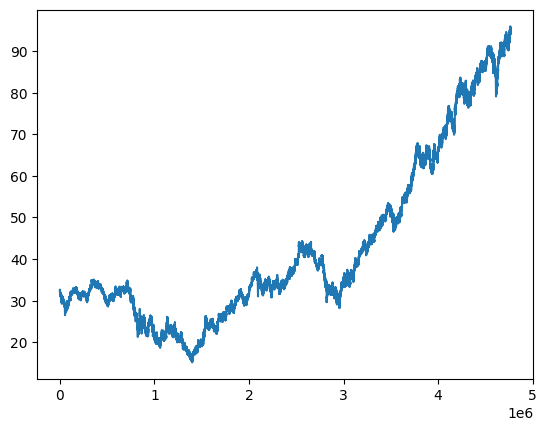

In [52]:
## T4/Q4
prices = disney["PRICE"].values
median_price = make_rolling_median(prices)
deviation = abs(median_price-prices)/median_price
prices = prices[deviation < 0.10]